In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


###  Visualize the Data
---

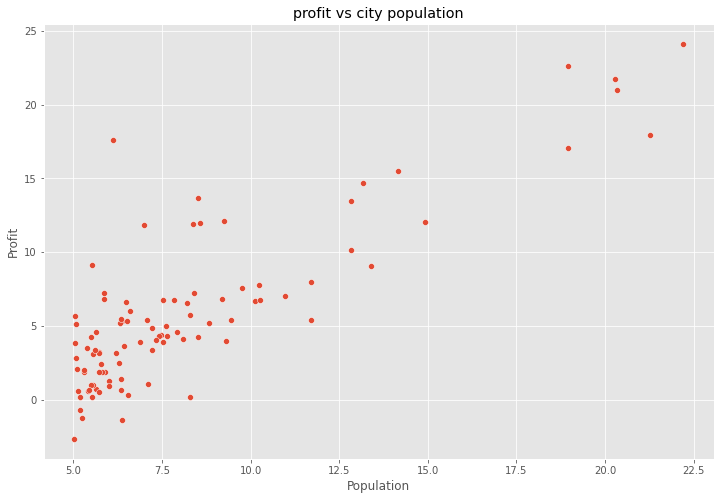

In [6]:
ax = sns.scatterplot(x='Population', y = 'Profit', data = data)
ax.set_title('profit vs city population');

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [8]:
def costfunction(x, y, theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y)**2
    
    return 1/(2*m)*np.sum(error)

In [10]:
m = data.Population.values.size
x = np.append(np.ones((m,1)),data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))
costfunction(x, y, theta)

32.072733877455676

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [13]:
def gradient_decsent(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(costfunction(x, y, theta))
    return theta, costs

In [14]:
theta, costs = gradient_decsent(x, y, theta, alpha= 0.01, iterations = 2000)

print('h(x)= {} + {}x1'.format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x)= -3.79 + 1.18x1


### Visualising the Cost Function $J(\theta)$
---

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
   for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i, j] = costfunction(x, y, t)

      

/var/folders/mf/7n_plpxn2rbg369ktzq8b8kc0000gn/T/ipykernel_11034/4087103934.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


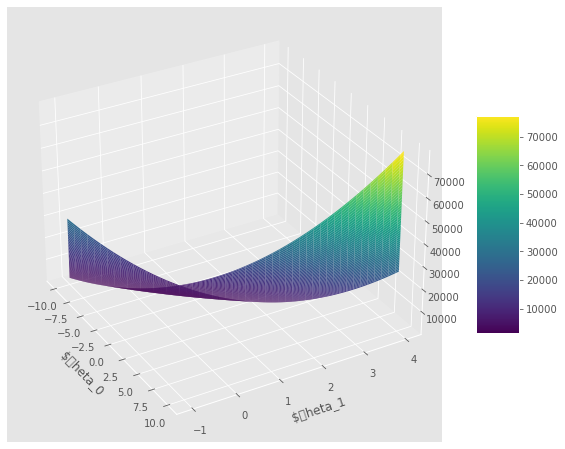

In [24]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.xlabel('$\theta_0')
plt.ylabel('$\theta_1')
#plt.set_zlabel('$J(\theta)$')
ax.view_init(30, 330)
plt.show()

### Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'values of cost function over iterations of gradient descent')

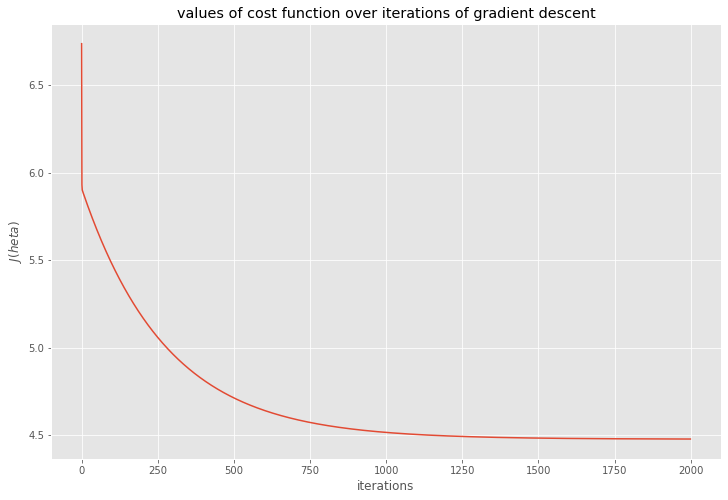

In [25]:
plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('$J(\theta)$')
plt.title('values of cost function over iterations of gradient descent')

### Training Data with Linear Regression Fit
---

In [26]:
theta.shape

(2, 1)

In [27]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/Users/parisafarahani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit')

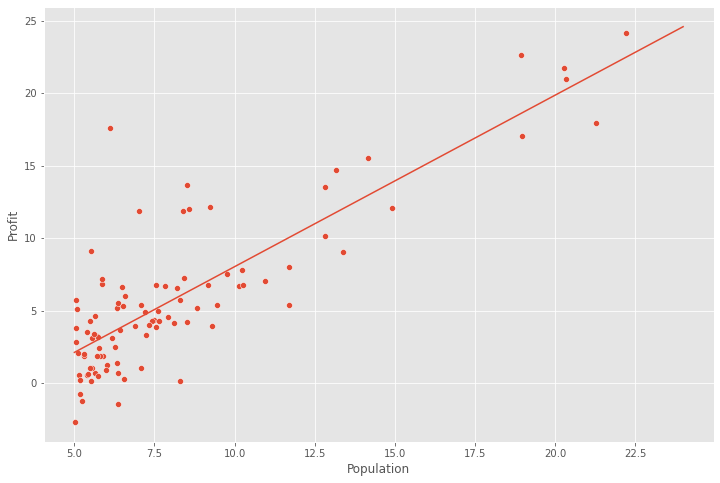

In [29]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y = 'Profit', data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel('Population')
plt.ylabel('Profit')

### Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [32]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [33]:
y_pred_1 = predict(np.array([1,4]), theta)*10000
print('population of 40000 people, the predictedprofit would be $'+ str(round(y_pred_1)))

population of 40000 people, the predictedprofit would be $9408


In [34]:
y_pred_2 = predict(np.array([1,8.3]), theta)*10000
print('population of 40000 people, the predictedprofit would be $'+ str(round(y_pred_2)))

population of 40000 people, the predictedprofit would be $60243
